In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
output_folder = "./"

In [41]:
n_samples = 300
xs = np.linspace(0, 30, n_samples, endpoint=False)
ys = xs + np.random.random(n_samples)*2 - 1

np.save(f'{output_folder}X_s.npy', xs)
np.save(f'{output_folder}Y_s.npy', ys)

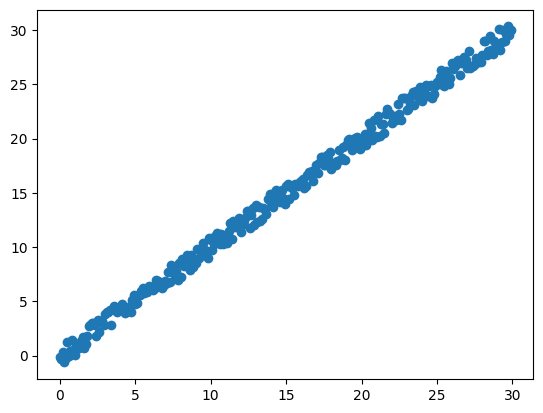

In [42]:
plt.scatter(xs, ys)
plt.show()

In [43]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys)

LinearRegression()



---



In [44]:
with open(f'{output_folder}myfile.pkl', 'wb') as output:
    pickle.dump(model, output)

In [45]:
xs_2 = np.linspace(30, 40, 100, endpoint=False)
ys_2 = xs_2 + np.random.random(100)*2 - 1

np.save(f'{output_folder}X_s_2.npy', xs_2)
np.save(f'{output_folder}Y_s_2.npy', ys_2)

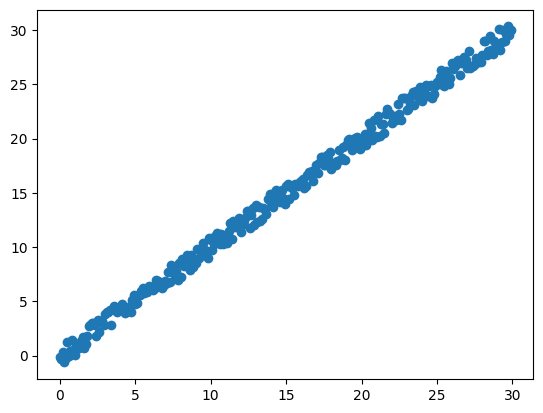

In [46]:
plt.scatter(xs, ys)
plt.show()

In [47]:
with open(f'{output_folder}myfile.pkl', 'rb') as pkl_file:
    regressor = pickle.load(pkl_file)

In [53]:
y_pred = regressor.predict(xs_2.reshape(-1, 1))

In [54]:
#max error - 2
print(mean_absolute_error(ys_2, y_pred))

0.5426827375807226


In [55]:
#max error - 4
print(mean_squared_error(ys_2, y_pred))

0.3709019265037853




---



In [64]:
xs_3 = np.linspace(40, 50, 100, endpoint=False)
ys_3 = xs_3 + np.random.random(100)*2 - 1


np.save(f'{output_folder}X_s_3.npy', xs_3)
np.save(f'{output_folder}Y_s_3.npy', ys_3)

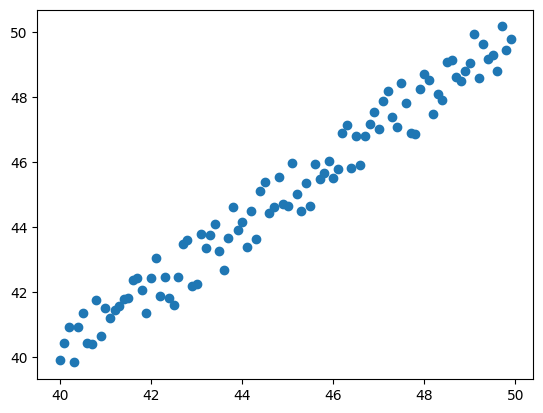

In [59]:
plt.scatter(xs_3, ys_3)
plt.show()

In [60]:
y_pred_2 = regressor.predict(xs_3.reshape(-1, 1))

In [61]:
mean_squared_error(ys_3, y_pred_2)

0.3158620585188585

In [62]:
mean_absolute_error(ys_3, y_pred_2)

0.4721364566640707



---



In [65]:
xs_err = np.linspace(50, 60, 100, endpoint=False)
ys_err = xs_err + np.random.random(100)*2 - 1
ys_err[30:50] *= 1.5

np.save(f'{output_folder}X_s_err.npy', xs_err)
np.save(f'{output_folder}Y_s_err.npy', ys_err)

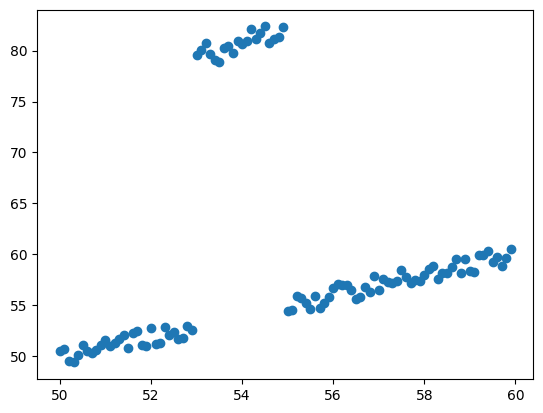

In [66]:
plt.scatter(xs_err, ys_err)
plt.show()

In [67]:
y_pred_3 = regressor.predict(xs_err.reshape(-1, 1))

In [68]:
mean_squared_error(ys_err, y_pred_3)

144.90362562704283

In [69]:
mean_absolute_error(ys_err, y_pred_3)

5.792626940334004

In [107]:
%%writefile test1.py

import pytest
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error

output_folder = "./"

@pytest.fixture()
def init_data():

  vec11 = np.load(f'{output_folder}X_s_2.npy')
  vec12 = np.load(f'{output_folder}Y_s_2.npy')
  vec21 = np.load(f'{output_folder}X_s_3.npy')
  vec22 = np.load(f'{output_folder}Y_s_3.npy')
  vec31 = np.load(f'{output_folder}X_s_err.npy')
  vec32 = np.load(f'{output_folder}Y_s_err.npy')

  return vec11, vec12, vec21, vec22, vec31, vec32

def test1(init_data):
  with open(f'{output_folder}myfile.pkl', 'rb') as pkl_file:
    regressor = pickle.load(pkl_file)
    y_pred = regressor.predict(init_data[0].reshape(-1, 1))
    assert mean_absolute_error(init_data[1], y_pred) <= 2

def test2(init_data):
  with open(f'{output_folder}myfile.pkl', 'rb') as pkl_file:
    regressor = pickle.load(pkl_file)
    y_pred = regressor.predict(init_data[2].reshape(-1, 1))
    assert mean_absolute_error(init_data[3], y_pred) <= 2

def test3(init_data):
  with open(f'{output_folder}myfile.pkl', 'rb') as pkl_file:
    regressor = pickle.load(pkl_file)
    y_pred = regressor.predict(init_data[4].reshape(-1, 1))
    assert mean_absolute_error(init_data[5], y_pred) <= 2

Overwriting test1.py


In [109]:
!pytest -v test1.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                              

test1.py::test1 PASSED                                                   [ 33%]
test1.py::test2 PASSED                                                   [ 66%]
test1.py::test3 FAILED                                                   [100%]

=================================== FAILURES ===================================
____________________________________ test3 _____________________________________

init_data = (array([30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. ,
       31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 3...67874, 59.96581123, 59.9571519 , 60.31637544,
       59.26144097, 59.68333131, 58.81468854, 59.63190671, 60.46680394]))

    def test3(init_data):
      with